In [2]:
import Pkg;
Pkg.activate(".")
using Plots, Measurements, LaTeXStrings, DataFrames
using Serialization

  Activating project at `~/Documents/thesis/ridepooling_simulations`


In [32]:
#path = "/scratch01.local/rhaag/comparison/drive_and_wait/combined_delays/anywt1_anydt01/"
#name = "/results_.df"
name = "./data/results_resub.df"
name = "./Playing field/drive_and_wait/anywt1.df"
name = "./Playing field/resubmission/anywt035.df"

"./Playing field/resubmission/anywt035.df"

In [33]:
results = deserialize(name)

1585×27 DataFrame
  Row │ index  dt_earliest_pickup  idle_weight  resubmission_time_factor  ν    ⋯
      │ Int64  Float64             Float64      Float64                   Floa ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │     1              0.0         -0.1475                     0.475   10. ⋯
    2 │     2              0.0          0.1                        0.5     10.
    3 │     3              0.0          0.3475                     0.525   10.
    4 │     4              0.0          0.595                      0.55    10.
    5 │     5              0.0          0.8425                     0.575   10. ⋯
    6 │     6              0.0          1.09                       0.6     10.
    7 │     7              0.0          1.3375                     0.625   10.
    8 │     8              0.0          1.585                      0.65    10.
    9 │     9              0.0          1.8325                     0.675   10. ⋯
   10 │    10              0.0          2.08                       0.7     10.
   11 │    11              0.0          2.3275                     0.725   10.
  ⋮   │   ⋮            ⋮                ⋮                  ⋮                 ⋮ ⋱
 1576 │  1591              1.4625       7.2775                     1.225   10.
 1577 │  1592              1.4625       7.525                      1.25    10. ⋯
 1578 │  1593              1.4625       7.7725                     1.275   10.
 1579 │  1594              1.4625       8.02                       1.3     10.
 1580 │  1595              1.4625       8.2675                     1.325   10.
 1581 │  1596              1.4625       8.515                      1.35    10. ⋯
 1582 │  1597              1.4625       8.7625                     1.375   10.
 1583 │  1598              1.4625       9.01                       1.4     10.
 1584 │  1599              1.4625       9.2575                     1.425   10.
 1585 │  1600              1.4625       9.505                      1.45    10. ⋯
                                                23 columns and 1564 rows omitted

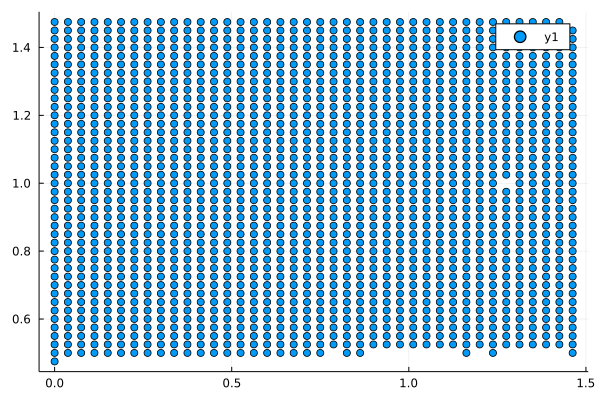

In [34]:
# Plot two colums against each other
x = getVal.(results.dt_earliest_pickup)
y = getVal.(results.resubmission_time_factor)
scatter(x, y)

In [35]:
results[1:1600, :]

LoadError: BoundsError: attempt to access 1585×27 DataFrame at index [1:1600, :]

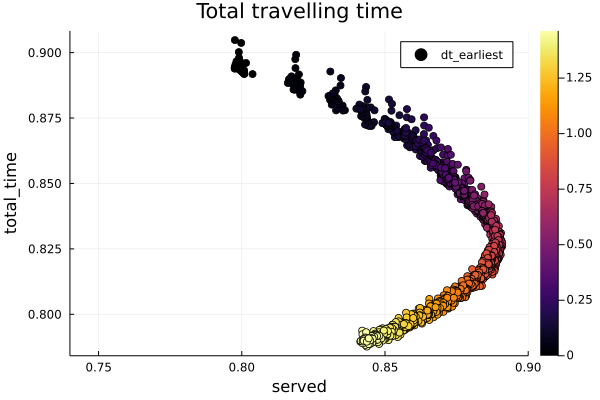

In [38]:
gr()
getVal(a::Measurement) = a.val
getVal(a::Float64)=a
# Plot two colums against each other with coloring of a thirs
z = getVal.(results.dt_earliest_pickup)
y = getVal.(results.total_time)
x = getVal.(results.served)



scatter(x, y,marker_z = z,label="dt_earliest", xlim=(0.74, 0.9))#, markershape = :rect)
xlabel!("served")
ylabel!("total_time")
savefig("dt_earliest.png")
title!("Total travelling time")


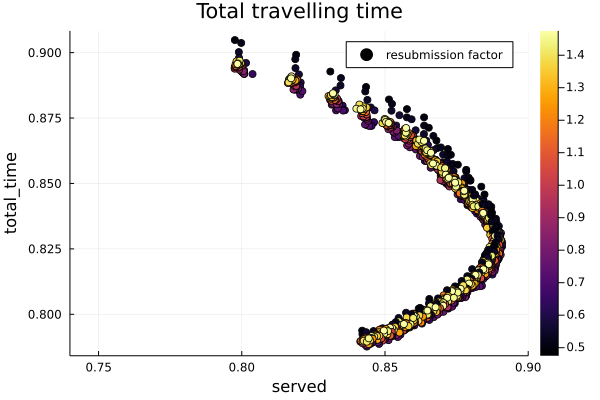

In [40]:
gr()
getVal(a::Measurement) = a.val
getVal(a::Float64)=a
# Plot two colums against each other with coloring of a thirs
z = getVal.(results.resubmission_time_factor)
y = getVal.(results.total_time)
x = getVal.(results.served)



scatter(x, y,marker_z = z,label="resubmission factor", xlim=(0.74, 0.9))#, markershape = :rect)
xlabel!("served")
ylabel!("total_time")
savefig("idle_weight.png")
title!("Total travelling time")


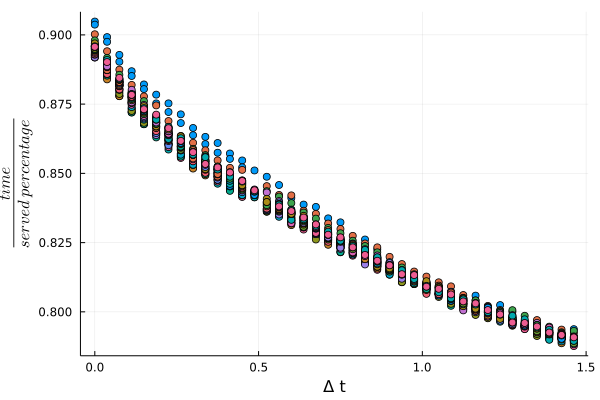

In [46]:
resub_data = sort!(results[1:1585, :], :resubmission_time_factor)[1:1585, :]
plot()
for i in 0:38
    
    data = resub_data[40*i+2:40*(i+1),:]
    x = getVal.(data.dt_earliest_pickup)

    y = getVal.(data.waiting_time)#./data.served)
    y2 = getVal.(data.total_time)#./data.served)
    y3 = getVal.(data.travelling_time)#./data.served)
    if i == 39
        #plot!(x,y, color=:blue, label = "waiting_time", legend=:left)
        scatter!(x,y2, color=:green, label = "total_time")
        #plot!(x,y3, color=:orange, label = "travelling_time")
    else
        #plot!(x,y, label=:none)
        scatter!(x,y2, label=:none)
        #plot!(x,y3, label=:none)
    end
end
xlabel!("Δ t")
ylabel!(L"\frac{time}{ served\,percentage}")
display(plot!())
savefig("figures/time_over_served.png")

In [ ]:
resub = results[1:1600]

# Pareto Fronts

In [52]:
#Plot Paretho front
function paretoCheck(row, paretoParams, pointcloud, better= <=)
    # Usage: filter(x->parethoCheck(x, pointcloud), pointcloud)
    for p in pointcloud
        for param in parethoParams
            if !(better(row[param], p[param]))
                
            end
        end
        #sum(better.(p,x)) == length(x) ? (return false) : nothing
    end
    return true
end

#gib true zurück, wenn ein x_i besser ist als das entsprechende p_i für alle p_s, wo die reslichen p_j schlechter sind
# Paretho Optimal: x ist in einer Richtung besser, als alle, die in anderen Richtungen besser sind.
# Oder wenn ich einen Punkt finde, der in mehr als einer Richtung besser ist als x, dann ist 


LoadError: syntax: unexpected "end"

In [ ]:
paretoPoints = []
paretoParams = [:served, :travelling_time]


for row in results
    if paretoCheck(row, paretoParams, results)
        push!(paretoPoints, row)
    end
end
paretoDf = DataFrame(paretoPoints[1])
for row in paretoPoints
    push!(paretoDf, row)
end
x = paretoDf[!, paretoParams[1]]
y = paretoDf[!, paretoParams[2]]
plot(x, y)